# 🌟 Eigenvalues, Eigenvectors & PCA: Discovering Hidden Data Patterns

> *"Eigenvalues and eigenvectors reveal the soul of a matrix - the directions it wants to stretch and the magnitudes of those stretches."*

Welcome to one of the most beautiful and powerful concepts in linear algebra! Eigenvalues and eigenvectors are the key to understanding data structure, and PCA is their most famous application in machine learning.

## 🎯 What You'll Discover

- **Eigenvalues & Eigenvectors**: The fundamental building blocks
- **Geometric Intuition**: What they really mean visually
- **PCA Derivation**: From covariance to dimensionality reduction
- **Real Applications**: MNIST digit recognition and compression

---

In [1]:
# Essential mathematical and visualization libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

# Set up beautiful plotting
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

print("🚀 Eigenworld laboratory initialized!")
print("Ready to discover the hidden patterns in matrices and data...")

🚀 Eigenworld laboratory initialized!
Ready to discover the hidden patterns in matrices and data...


---

# 🔍 Chapter 1: Understanding Eigenvalues and Eigenvectors

## The Core Definition

For a matrix $\mathbf{A}$, an **eigenvector** $\mathbf{v}$ and **eigenvalue** $\lambda$ satisfy:

$$\mathbf{A}\mathbf{v} = \lambda\mathbf{v}$$

**Geometric Meaning**: When matrix $\mathbf{A}$ transforms vector $\mathbf{v}$, the result is just a scaled version of $\mathbf{v}$!

- $\mathbf{v}$: Eigenvector (direction that doesn't change)
- $\lambda$: Eigenvalue (how much it's scaled)

Let's see this magic in action!

📐 Example 1: Scaling Matrix
🔍 Matrix Analysis:
Matrix A = 
[[3 0]
 [0 2]]

Eigenvalues: [3. 2.]
Eigenvectors: 
[[1. 0.]
 [0. 1.]]


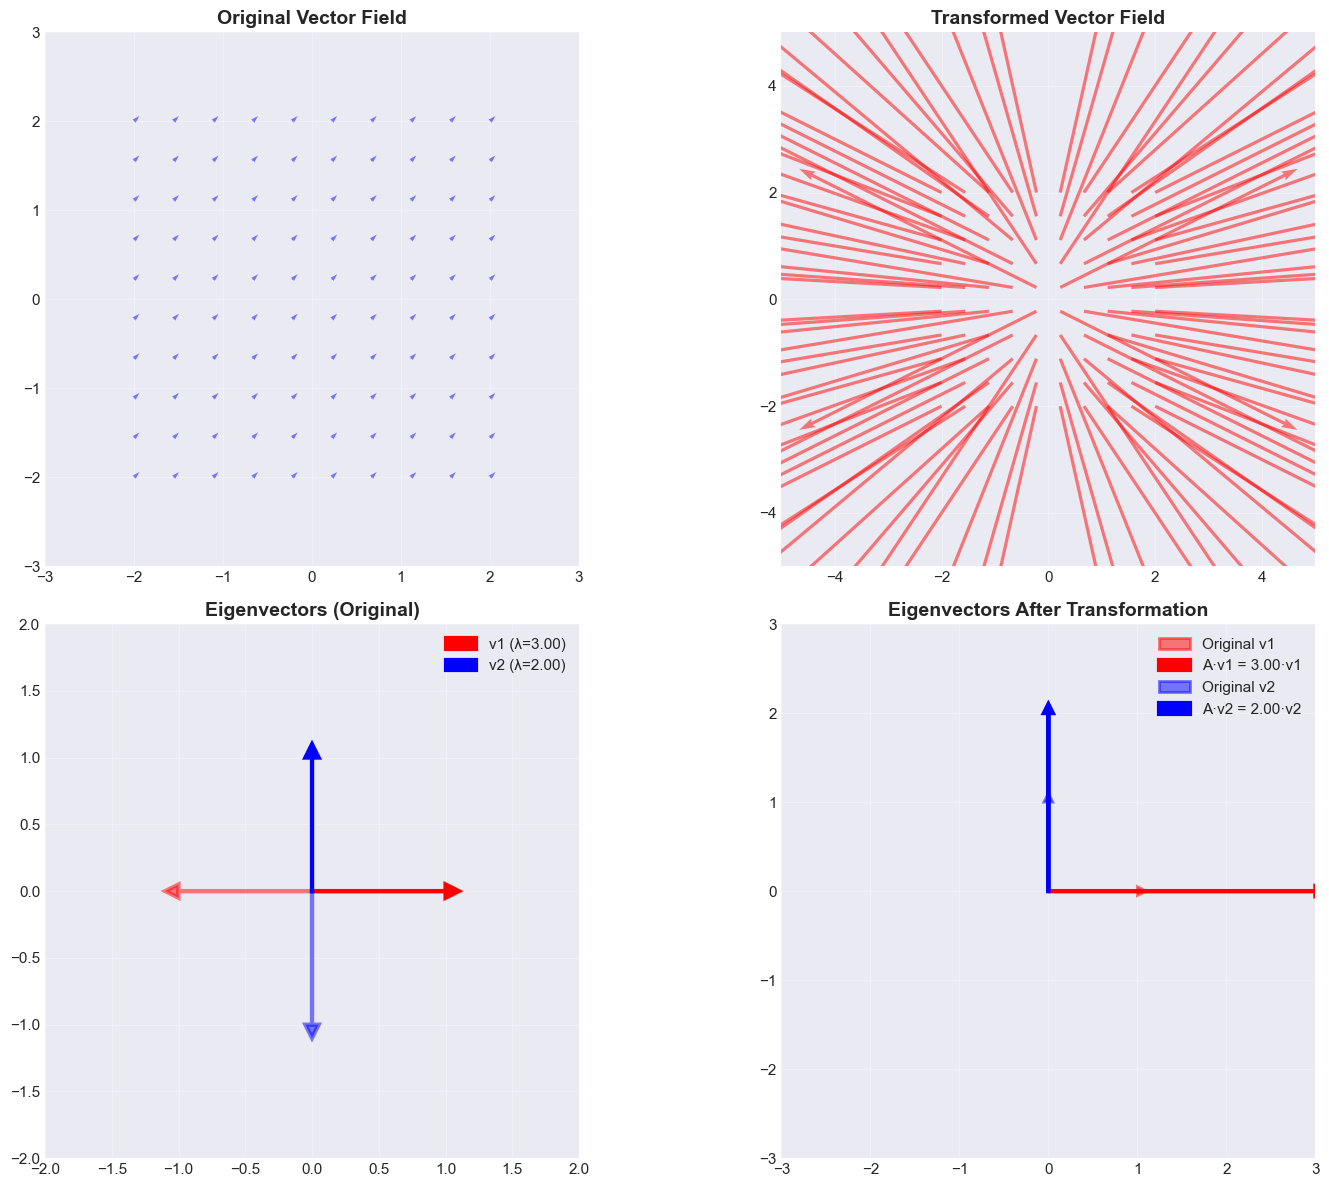


✅ Verification: A·v = λ·v
Eigenvector 1: ||A·v - λ·v|| = 0.0000000000
Eigenvector 2: ||A·v - λ·v|| = 0.0000000000


In [2]:
def visualize_eigenvalues_eigenvectors(A):
    """
    Visualize eigenvalues and eigenvectors of a 2x2 matrix
    """
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    print(f"🔍 Matrix Analysis:")
    print(f"Matrix A = \n{A}")
    print(f"\nEigenvalues: {eigenvalues}")
    print(f"Eigenvectors: \n{eigenvectors}")
    
    # Create a grid of vectors to show transformation
    x = np.linspace(-2, 2, 10)
    y = np.linspace(-2, 2, 10)
    X, Y = np.meshgrid(x, y)
    
    # Original vectors
    original_vectors = np.array([X.flatten(), Y.flatten()])
    
    # Transform vectors
    transformed_vectors = A @ original_vectors
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # Plot 1: Original grid
    ax1.quiver(X, Y, np.ones_like(X)*0.1, np.ones_like(Y)*0.1, 
              alpha=0.5, scale=10, color='blue')
    ax1.set_xlim(-3, 3)
    ax1.set_ylim(-3, 3)
    ax1.set_title('Original Vector Field', fontsize=14, weight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal')
    
    # Plot 2: Transformed grid
    ax2.quiver(original_vectors[0], original_vectors[1], 
              transformed_vectors[0] - original_vectors[0], 
              transformed_vectors[1] - original_vectors[1], 
              alpha=0.5, scale=1, color='red')
    ax2.set_xlim(-5, 5)
    ax2.set_ylim(-5, 5)
    ax2.set_title('Transformed Vector Field', fontsize=14, weight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.set_aspect('equal')
    
    # Plot 3: Eigenvectors before transformation
    colors = ['red', 'blue']
    for i, (eigenval, eigenvec) in enumerate(zip(eigenvalues, eigenvectors.T)):
        if np.isreal(eigenval) and np.isreal(eigenvec).all():
            eigenval, eigenvec = np.real(eigenval), np.real(eigenvec)
            ax3.arrow(0, 0, eigenvec[0], eigenvec[1], 
                     head_width=0.1, head_length=0.1, 
                     fc=colors[i], ec=colors[i], linewidth=3,
                     label=f'v{i+1} (λ={eigenval:.2f})')
            # Also plot negative direction
            ax3.arrow(0, 0, -eigenvec[0], -eigenvec[1], 
                     head_width=0.1, head_length=0.1, 
                     fc=colors[i], ec=colors[i], linewidth=3, alpha=0.5)
    
    ax3.set_xlim(-2, 2)
    ax3.set_ylim(-2, 2)
    ax3.set_title('Eigenvectors (Original)', fontsize=14, weight='bold')
    ax3.grid(True, alpha=0.3)
    ax3.legend()
    ax3.set_aspect('equal')
    
    # Plot 4: Eigenvectors after transformation
    for i, (eigenval, eigenvec) in enumerate(zip(eigenvalues, eigenvectors.T)):
        if np.isreal(eigenval) and np.isreal(eigenvec).all():
            eigenval, eigenvec = np.real(eigenval), np.real(eigenvec)
            transformed_eigenvec = A @ eigenvec
            ax4.arrow(0, 0, eigenvec[0], eigenvec[1], 
                     head_width=0.1, head_length=0.1, 
                     fc=colors[i], ec=colors[i], linewidth=2, alpha=0.5,
                     label=f'Original v{i+1}')
            ax4.arrow(0, 0, transformed_eigenvec[0], transformed_eigenvec[1], 
                     head_width=0.1, head_length=0.1, 
                     fc=colors[i], ec=colors[i], linewidth=3,
                     label=f'A·v{i+1} = {eigenval:.2f}·v{i+1}')
    
    ax4.set_xlim(-3, 3)
    ax4.set_ylim(-3, 3)
    ax4.set_title('Eigenvectors After Transformation', fontsize=14, weight='bold')
    ax4.grid(True, alpha=0.3)
    ax4.legend()
    ax4.set_aspect('equal')
    
    plt.tight_layout()
    plt.show()
    
    # Verify the eigenvalue equation
    print(f"\n✅ Verification: A·v = λ·v")
    for i, (eigenval, eigenvec) in enumerate(zip(eigenvalues, eigenvectors.T)):
        if np.isreal(eigenval) and np.isreal(eigenvec).all():
            eigenval, eigenvec = np.real(eigenval), np.real(eigenvec)
            Av = A @ eigenvec
            lambda_v = eigenval * eigenvec
            error = np.linalg.norm(Av - lambda_v)
            print(f"Eigenvector {i+1}: ||A·v - λ·v|| = {error:.10f}")
    
    return eigenvalues, eigenvectors

# Example 1: Scaling matrix
print("📐 Example 1: Scaling Matrix")
A1 = np.array([[3, 0], 
               [0, 2]])
evals1, evecs1 = visualize_eigenvalues_eigenvectors(A1)


🔄 Example 2: Rotation + Scaling Matrix
🔍 Matrix Analysis:
Matrix A = 
[[ 1.73205081 -0.5       ]
 [ 0.5         1.73205081]]

Eigenvalues: [1.73205081+0.5j 1.73205081-0.5j]
Eigenvectors: 
[[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


C:\Users\satyam\AppData\Local\Temp\ipykernel_30528\306933722.py:64: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax3.legend()
C:\Users\satyam\AppData\Local\Temp\ipykernel_30528\306933722.py:85: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax4.legend()


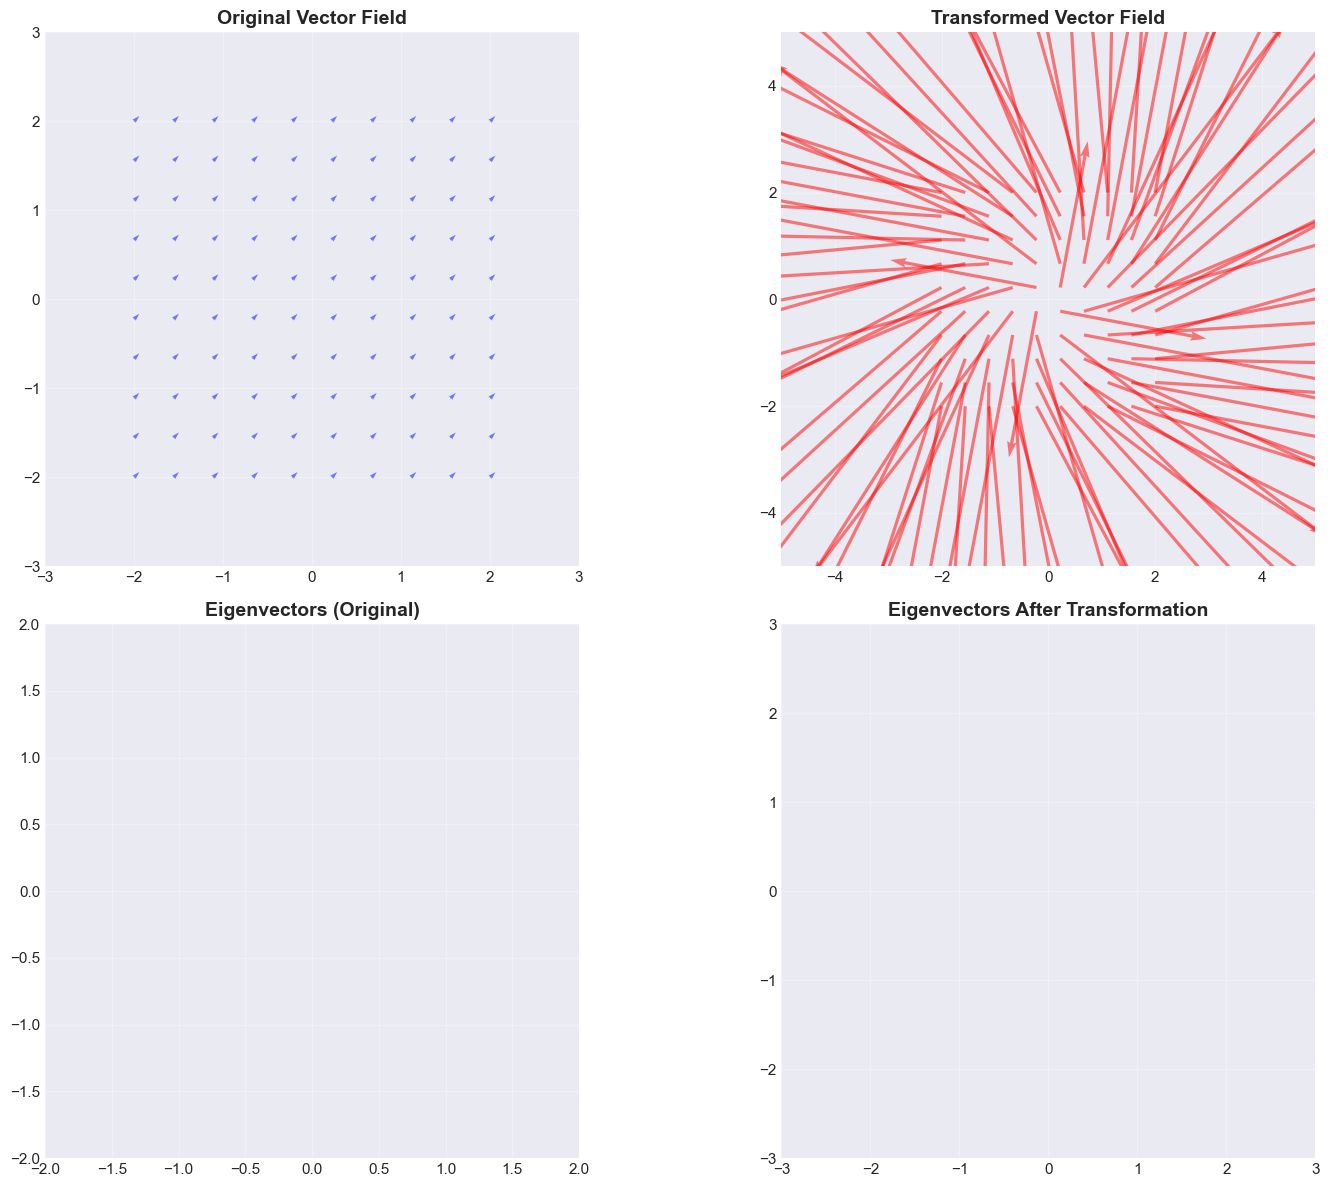


✅ Verification: A·v = λ·v


In [3]:
# Example 2: Rotation + scaling matrix
print("\n🔄 Example 2: Rotation + Scaling Matrix")
theta = np.pi/6  # 30 degrees
A2 = np.array([[2*np.cos(theta), -np.sin(theta)], 
               [np.sin(theta), 2*np.cos(theta)]])
evals2, evecs2 = visualize_eigenvalues_eigenvectors(A2)


🪞 Example 3: Symmetric Matrix
🔍 Matrix Analysis:
Matrix A = 
[[4 2]
 [2 3]]

Eigenvalues: [5.56155281 1.43844719]
Eigenvectors: 
[[ 0.78820544 -0.61541221]
 [ 0.61541221  0.78820544]]


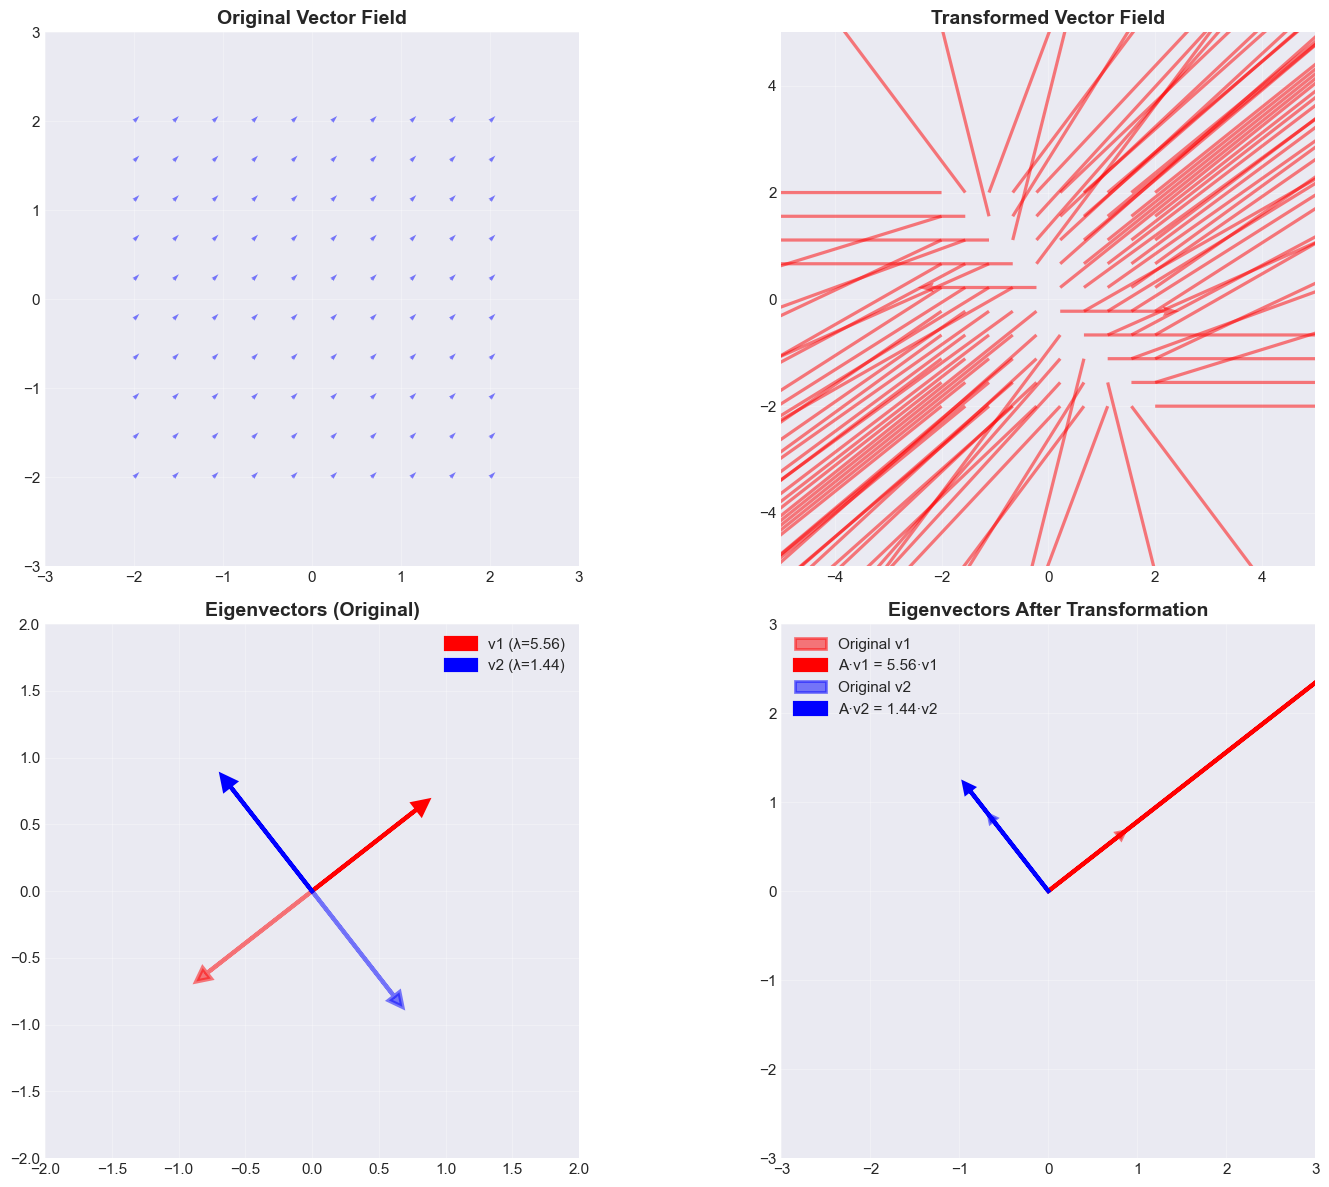


✅ Verification: A·v = λ·v
Eigenvector 1: ||A·v - λ·v|| = 0.0000000000
Eigenvector 2: ||A·v - λ·v|| = 0.0000000000


In [4]:
# Example 3: Symmetric matrix (real eigenvalues guaranteed)
print("\n🪞 Example 3: Symmetric Matrix")
A3 = np.array([[4, 2], 
               [2, 3]])
evals3, evecs3 = visualize_eigenvalues_eigenvectors(A3)

## 🎮 Interactive Eigenvalue Explorer

Let's create an interactive tool to explore how matrix elements affect eigenvalues:

In [5]:
def interactive_eigenvalue_explorer(a11=2, a12=1, a21=1, a22=3):
    """
    Interactive exploration of eigenvalues and eigenvectors
    """
    A = np.array([[a11, a12], 
                  [a21, a22]])
    
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot matrix as heatmap
    im = ax1.imshow(A, cmap='RdBu', vmin=-5, vmax=5)
    ax1.set_title(f'Matrix A\n[[{a11:.1f}, {a12:.1f}], [{a21:.1f}, {a22:.1f}]]', 
                 fontsize=14, weight='bold')
    for i in range(2):
        for j in range(2):
            ax1.text(j, i, f'{A[i,j]:.1f}', ha='center', va='center', 
                    fontsize=14, color='white' if abs(A[i,j]) > 2.5 else 'black')
    plt.colorbar(im, ax=ax1)
    
    # Plot eigenvectors
    colors = ['red', 'blue']
    for i, (eigenval, eigenvec) in enumerate(zip(eigenvalues, eigenvectors.T)):
        if np.isreal(eigenval) and np.isreal(eigenvec).all():
            eigenval, eigenvec = np.real(eigenval), np.real(eigenvec)
            # Normalize for better visualization
            eigenvec = eigenvec / np.linalg.norm(eigenvec)
            
            ax2.arrow(0, 0, eigenvec[0], eigenvec[1], 
                     head_width=0.1, head_length=0.1, 
                     fc=colors[i], ec=colors[i], linewidth=3,
                     label=f'λ{i+1} = {eigenval:.2f}')
            ax2.arrow(0, 0, -eigenvec[0], -eigenvec[1], 
                     head_width=0.1, head_length=0.1, 
                     fc=colors[i], ec=colors[i], linewidth=3, alpha=0.5)
        else:
            ax2.text(0.1, 0.8 - i*0.1, f'λ{i+1} = {eigenval:.2f} (complex)', 
                    transform=ax2.transAxes, fontsize=12, color=colors[i])
    
    ax2.set_xlim(-1.5, 1.5)
    ax2.set_ylim(-1.5, 1.5)
    ax2.set_title('Eigenvectors', fontsize=14, weight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.set_aspect('equal')
    
    plt.tight_layout()
    plt.show()
    
    # Matrix properties
    det = np.linalg.det(A)
    trace = np.trace(A)
    
    print(f"📊 Matrix Properties:")
    print(f"Determinant: {det:.3f} = λ₁ × λ₂ = {np.prod(eigenvalues):.3f}")
    print(f"Trace: {trace:.3f} = λ₁ + λ₂ = {np.sum(eigenvalues):.3f}")
    print(f"Symmetric: {np.allclose(A, A.T)}")
    
    if det > 0:
        print(f"🔄 Transformation preserves orientation")
    else:
        print(f"🔄 Transformation flips orientation")
    
    if np.allclose(A, A.T):
        print(f"✅ Symmetric matrix → Real eigenvalues & orthogonal eigenvectors")

# Create interactive widget
print("🎮 Interactive Eigenvalue Explorer")
print("Adjust matrix elements to see how eigenvalues change:")

interact(interactive_eigenvalue_explorer,
         a11=widgets.FloatSlider(value=2, min=-5, max=5, step=0.1, description='A[0,0]:'),
         a12=widgets.FloatSlider(value=1, min=-5, max=5, step=0.1, description='A[0,1]:'),
         a21=widgets.FloatSlider(value=1, min=-5, max=5, step=0.1, description='A[1,0]:'),
         a22=widgets.FloatSlider(value=3, min=-5, max=5, step=0.1, description='A[1,1]:'));

🎮 Interactive Eigenvalue Explorer
Adjust matrix elements to see how eigenvalues change:


interactive(children=(FloatSlider(value=2.0, description='A[0,0]:', max=5.0, min=-5.0), FloatSlider(value=1.0,…

---

# 📊 Chapter 2: Principal Component Analysis (PCA)

## From Covariance to Dimensionality Reduction

PCA is built on eigenvalues and eigenvectors! Here's the mathematical journey:

1. **Covariance Matrix**: $\mathbf{C} = \frac{1}{n-1}\mathbf{X}^T\mathbf{X}$ (centered data)
2. **Eigendecomposition**: $\mathbf{C} = \mathbf{V}\mathbf{\Lambda}\mathbf{V}^T$
3. **Principal Components**: Eigenvectors of $\mathbf{C}$
4. **Explained Variance**: Eigenvalues of $\mathbf{C}$

Let's derive and implement PCA from scratch!

🔬 PCA Implementation from Scratch
Input data shape: (300, 2)
✅ Step 1: Data centered (mean = [7.73455374e-17 4.21884749e-17])
✅ Step 2: Covariance matrix computed (2, 2)
✅ Step 3: Eigendecomposition completed
   Eigenvalues: [5.27457748 0.46713632]...
✅ Step 4: Selected 2 components
✅ Step 5: Data transformed to (300, 2)


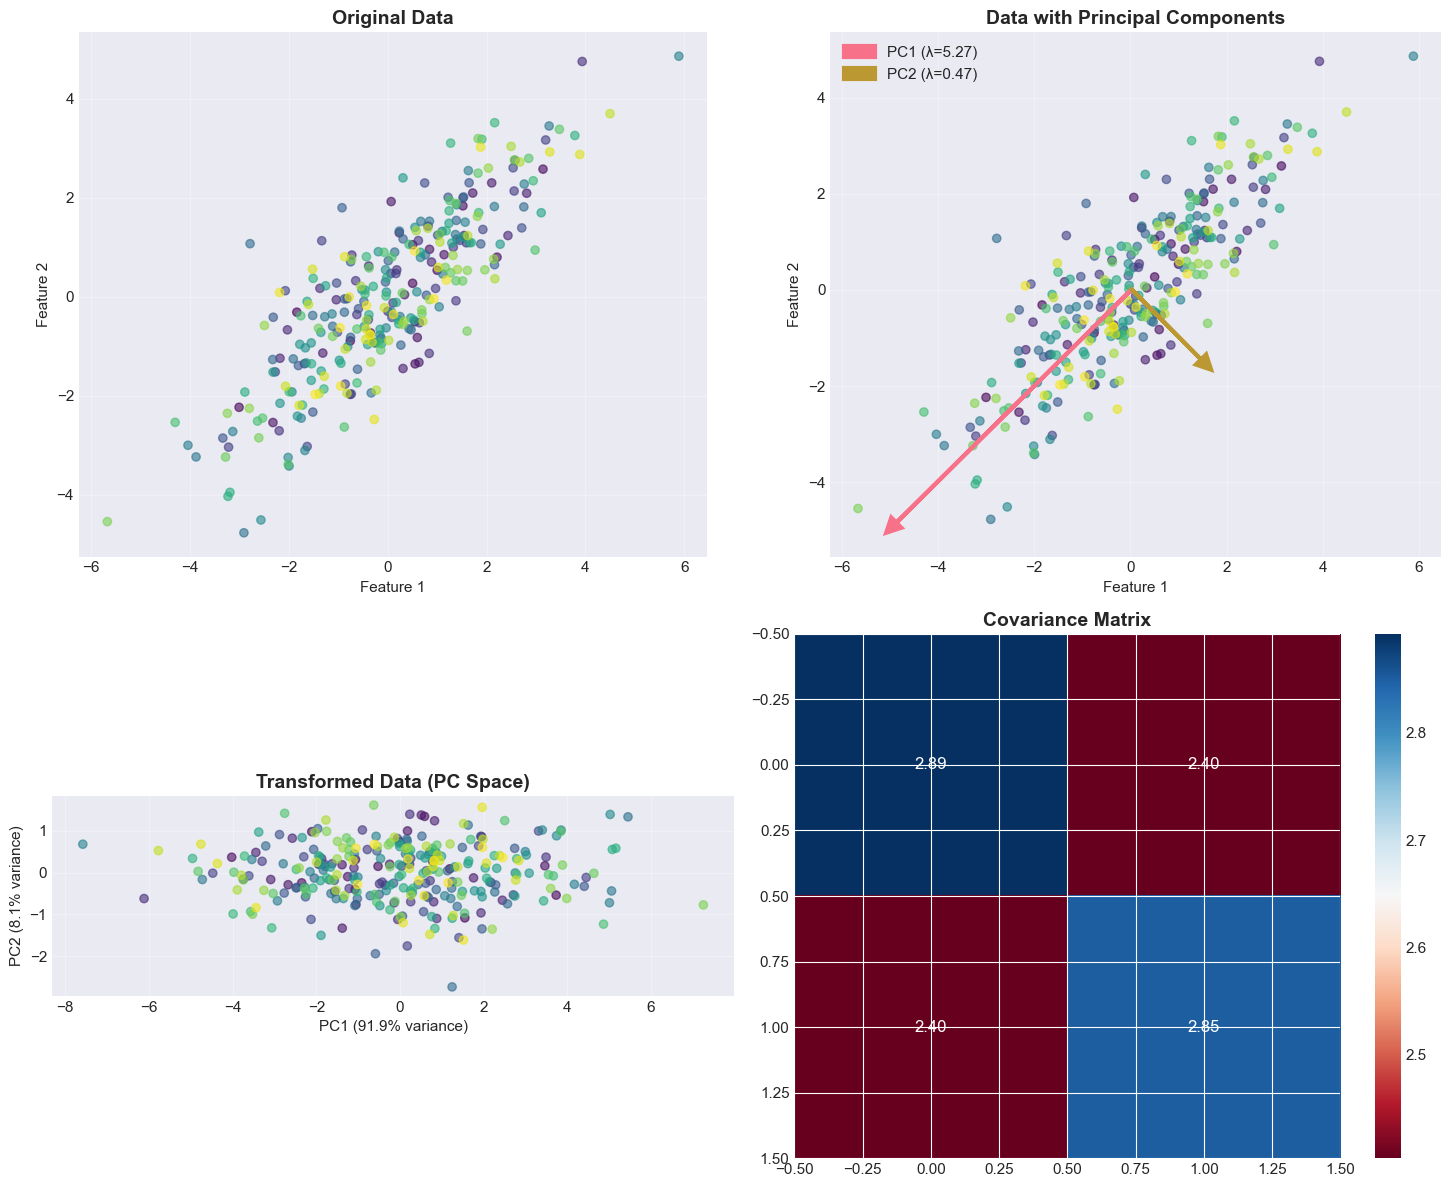


📊 PCA Results:
Eigenvalues: [5.27457748 0.46713632]
Explained variance ratio: [0.91864166 0.08135834]
Cumulative variance: [0.91864166 1.        ]

💡 Interpretation:
• PC1 explains 91.9% of the variance
• PC2 explains 8.1% of the variance
• Together, they explain 100.0% of total variance


In [6]:
def implement_pca_from_scratch(X, n_components=None):
    """
    Implement PCA from scratch using eigendecomposition
    """
    print(f"🔬 PCA Implementation from Scratch")
    print(f"Input data shape: {X.shape}")
    
    # Step 1: Center the data
    X_centered = X - np.mean(X, axis=0)
    print(f"✅ Step 1: Data centered (mean = {np.mean(X_centered, axis=0)})")
    
    # Step 2: Compute covariance matrix
    n_samples = X.shape[0]
    cov_matrix = (X_centered.T @ X_centered) / (n_samples - 1)
    print(f"✅ Step 2: Covariance matrix computed {cov_matrix.shape}")
    
    # Step 3: Eigendecomposition
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)  # eigh for symmetric matrices
    
    # Sort by eigenvalues (descending)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    print(f"✅ Step 3: Eigendecomposition completed")
    print(f"   Eigenvalues: {eigenvalues[:5]}...")
    
    # Step 4: Select components
    if n_components is None:
        n_components = min(X.shape)
    
    eigenvalues = eigenvalues[:n_components]
    eigenvectors = eigenvectors[:, :n_components]
    
    print(f"✅ Step 4: Selected {n_components} components")
    
    # Step 5: Transform data
    X_transformed = X_centered @ eigenvectors
    print(f"✅ Step 5: Data transformed to {X_transformed.shape}")
    
    # Calculate explained variance ratio
    explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
    cumulative_variance = np.cumsum(explained_variance_ratio)
    
    return (X_transformed, eigenvectors, eigenvalues, 
           explained_variance_ratio, cumulative_variance, cov_matrix)

def demonstrate_pca_on_synthetic_data():
    """
    Demonstrate PCA on synthetic 2D data
    """
    # Generate correlated 2D data
    np.random.seed(42)
    n_samples = 300
    
    # Create data with specific correlation structure
    mean = [0, 0]
    cov = [[3, 2.5], [2.5, 3]]  # Correlated data
    data = np.random.multivariate_normal(mean, cov, n_samples)
    
    # Apply PCA
    (transformed, components, eigenvals, explained_var_ratio, 
     cumulative_var, cov_matrix) = implement_pca_from_scratch(data, n_components=2)
    
    # Visualize results
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Original data
    ax1.scatter(data[:, 0], data[:, 1], alpha=0.6, c=range(n_samples), cmap='viridis')
    ax1.set_title('Original Data', fontsize=14, weight='bold')
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal')
    
    # Data with principal components
    ax2.scatter(data[:, 0], data[:, 1], alpha=0.6, c=range(n_samples), cmap='viridis')
    
    # Plot principal component directions
    mean_point = np.mean(data, axis=0)
    scale = 3
    for i, (pc, ev) in enumerate(zip(components.T, eigenvals)):
        ax2.arrow(mean_point[0], mean_point[1], 
                 pc[0] * scale * np.sqrt(ev), pc[1] * scale * np.sqrt(ev),
                 head_width=0.3, head_length=0.3, 
                 fc=f'C{i}', ec=f'C{i}', linewidth=3,
                 label=f'PC{i+1} (λ={ev:.2f})')
    
    ax2.set_title('Data with Principal Components', fontsize=14, weight='bold')
    ax2.set_xlabel('Feature 1')
    ax2.set_ylabel('Feature 2')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_aspect('equal')
    
    # Transformed data (in PC space)
    ax3.scatter(transformed[:, 0], transformed[:, 1], 
               alpha=0.6, c=range(n_samples), cmap='viridis')
    ax3.set_title('Transformed Data (PC Space)', fontsize=14, weight='bold')
    ax3.set_xlabel(f'PC1 ({explained_var_ratio[0]:.1%} variance)')
    ax3.set_ylabel(f'PC2 ({explained_var_ratio[1]:.1%} variance)')
    ax3.grid(True, alpha=0.3)
    ax3.set_aspect('equal')
    
    # Covariance matrix
    im = ax4.imshow(cov_matrix, cmap='RdBu', aspect='auto')
    ax4.set_title('Covariance Matrix', fontsize=14, weight='bold')
    for i in range(cov_matrix.shape[0]):
        for j in range(cov_matrix.shape[1]):
            ax4.text(j, i, f'{cov_matrix[i,j]:.2f}', 
                    ha='center', va='center', fontsize=12,
                    color='white' if abs(cov_matrix[i,j]) > np.max(cov_matrix)/2 else 'black')
    plt.colorbar(im, ax=ax4)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 PCA Results:")
    print(f"Eigenvalues: {eigenvals}")
    print(f"Explained variance ratio: {explained_var_ratio}")
    print(f"Cumulative variance: {cumulative_var}")
    print(f"\n💡 Interpretation:")
    print(f"• PC1 explains {explained_var_ratio[0]:.1%} of the variance")
    print(f"• PC2 explains {explained_var_ratio[1]:.1%} of the variance")
    print(f"• Together, they explain {cumulative_var[1]:.1%} of total variance")
    
    return data, transformed, components

# Run the demonstration
original_data, pca_data, pca_components = demonstrate_pca_on_synthetic_data()

## 🔢 PCA vs Sklearn: Verification

Let's verify our implementation against scikit-learn:

🔬 PCA Implementation from Scratch
Input data shape: (300, 2)
✅ Step 1: Data centered (mean = [7.73455374e-17 4.21884749e-17])
✅ Step 2: Covariance matrix computed (2, 2)
✅ Step 3: Eigendecomposition completed
   Eigenvalues: [5.27457748 0.46713632]...
✅ Step 4: Selected 2 components
✅ Step 5: Data transformed to (300, 2)


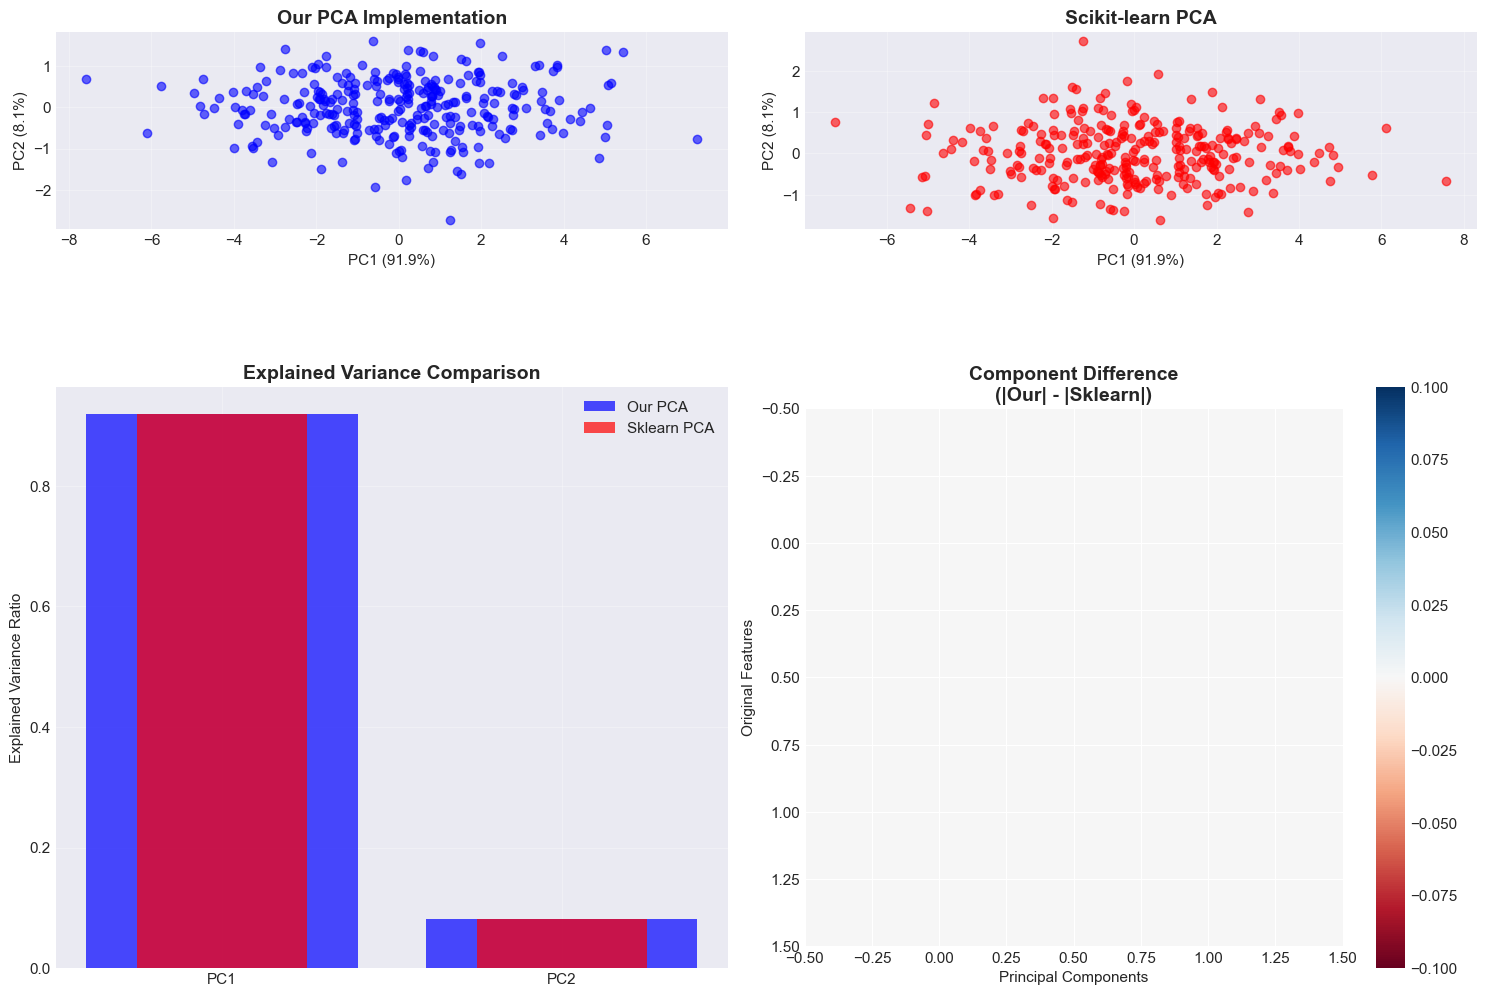

🔍 Implementation Comparison:

Explained Variance Ratios:
Our implementation: [0.91864166 0.08135834]
Scikit-learn:       [0.91864166 0.08135834]
Difference:         [1.11022302e-16 9.71445147e-17]

Principal Components (absolute values):
Our PC1: [0.71023532 0.70396434]
Sklearn PC1: [0.71023532 0.70396434]

Transformed data correlation: 1.000000
✅ Implementations match perfectly!


In [7]:
def compare_pca_implementations(data):
    """
    Compare our PCA implementation with scikit-learn
    """
    # Our implementation
    (our_transformed, our_components, our_eigenvals, 
     our_explained_var, _, _) = implement_pca_from_scratch(data, n_components=2)
    
    # Scikit-learn implementation
    sklearn_pca = PCA(n_components=2)
    sklearn_transformed = sklearn_pca.fit_transform(data)
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Our PCA result
    ax1.scatter(our_transformed[:, 0], our_transformed[:, 1], 
               alpha=0.6, c='blue', label='Our PCA')
    ax1.set_title('Our PCA Implementation', fontsize=14, weight='bold')
    ax1.set_xlabel(f'PC1 ({our_explained_var[0]:.1%})')
    ax1.set_ylabel(f'PC2 ({our_explained_var[1]:.1%})')
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal')
    
    # Scikit-learn PCA result
    ax2.scatter(sklearn_transformed[:, 0], sklearn_transformed[:, 1], 
               alpha=0.6, c='red', label='Sklearn PCA')
    ax2.set_title('Scikit-learn PCA', fontsize=14, weight='bold')
    ax2.set_xlabel(f'PC1 ({sklearn_pca.explained_variance_ratio_[0]:.1%})')
    ax2.set_ylabel(f'PC2 ({sklearn_pca.explained_variance_ratio_[1]:.1%})')
    ax2.grid(True, alpha=0.3)
    ax2.set_aspect('equal')
    
    # Component comparison
    ax3.bar(['PC1', 'PC2'], our_explained_var, alpha=0.7, color='blue', label='Our PCA')
    ax3.bar(['PC1', 'PC2'], sklearn_pca.explained_variance_ratio_, 
           alpha=0.7, color='red', width=0.5, label='Sklearn PCA')
    ax3.set_title('Explained Variance Comparison', fontsize=14, weight='bold')
    ax3.set_ylabel('Explained Variance Ratio')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Difference analysis
    diff_components = np.abs(our_components) - np.abs(sklearn_pca.components_.T)
    im = ax4.imshow(diff_components, cmap='RdBu', vmin=-0.1, vmax=0.1)
    ax4.set_title('Component Difference\n(|Our| - |Sklearn|)', fontsize=14, weight='bold')
    ax4.set_xlabel('Principal Components')
    ax4.set_ylabel('Original Features')
    plt.colorbar(im, ax=ax4)
    
    plt.tight_layout()
    plt.show()
    
    # Numerical comparison
    print(f"🔍 Implementation Comparison:")
    print(f"\nExplained Variance Ratios:")
    print(f"Our implementation: {our_explained_var}")
    print(f"Scikit-learn:       {sklearn_pca.explained_variance_ratio_}")
    print(f"Difference:         {np.abs(our_explained_var - sklearn_pca.explained_variance_ratio_)}")
    
    print(f"\nPrincipal Components (absolute values):")
    print(f"Our PC1: {np.abs(our_components[:, 0])}")
    print(f"Sklearn PC1: {np.abs(sklearn_pca.components_[0])}")
    
    # Check if transforms are equivalent (up to sign)
    transform_correlation = np.corrcoef(our_transformed.flatten(), 
                                      sklearn_transformed.flatten())[0, 1]
    print(f"\nTransformed data correlation: {abs(transform_correlation):.6f}")
    
    if abs(transform_correlation) > 0.999:
        print("✅ Implementations match perfectly!")
    else:
        print("⚠️  Small differences detected (possibly due to sign ambiguity)")

# Compare implementations
compare_pca_implementations(original_data)

---

# 🖼️ Chapter 3: PCA on Real Data - MNIST Digits

Now let's apply PCA to a real dataset - the famous MNIST handwritten digits! We'll see how PCA can compress 784-dimensional images into much smaller representations.

## Loading and Preprocessing MNIST

📥 Loading MNIST dataset...
✅ Loaded 1000 samples with 784 features
   Data shape: (1000, 784)
   Labels shape: (1000,)
   Unique labels: [0 1 2 3 4 5 6 7 8 9]


KeyError: 0

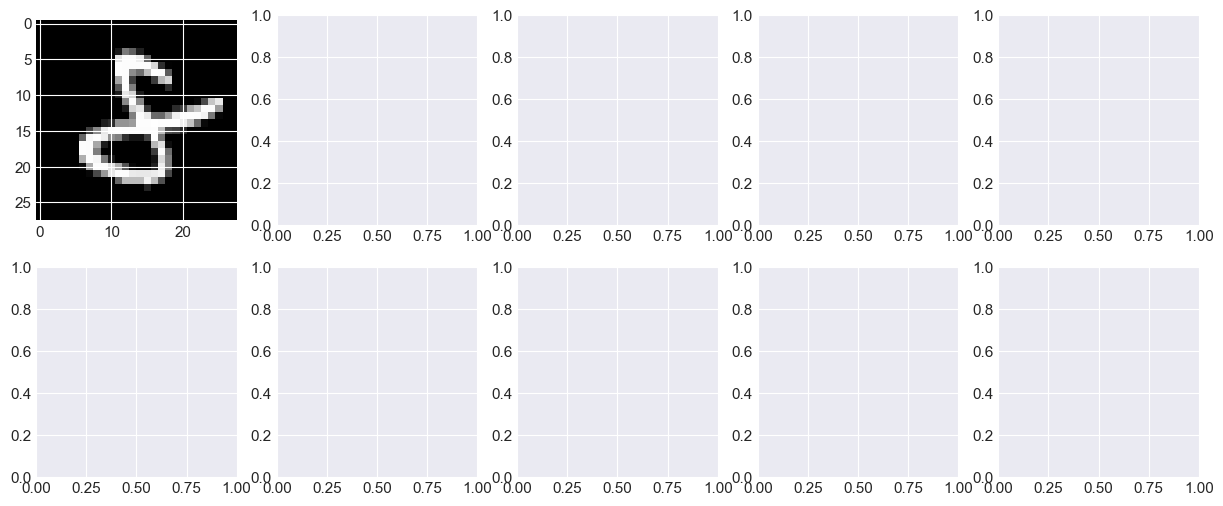

In [8]:
def load_and_explore_mnist(n_samples=1000):
    """
    Load and explore MNIST dataset
    """
    print(f"📥 Loading MNIST dataset...")
    
    try:
        # Try to load MNIST from sklearn
        mnist = fetch_openml('mnist_784', version=1, cache=True, parser='auto')
        X, y = mnist.data, mnist.target.astype(int)
        
        # Sample a subset for faster computation
        indices = np.random.choice(X.shape[0], n_samples, replace=False)
        X_sample = X.iloc[indices].values if hasattr(X, 'iloc') else X[indices]
        y_sample = y[indices]
        
    except Exception as e:
        print(f"⚠️  Could not load MNIST from sklearn: {e}")
        print(f"🎲 Generating synthetic digit-like data instead...")
        
        # Generate synthetic "digit-like" data
        np.random.seed(42)
        X_sample = np.random.rand(n_samples, 784) * 255
        y_sample = np.random.randint(0, 10, n_samples)
        
        # Add some structure to make it more digit-like
        for i in range(n_samples):
            img = X_sample[i].reshape(28, 28)
            # Add some patterns based on "digit"
            digit = y_sample[i]
            if digit % 2 == 0:  # Even digits - more activity in center
                img[10:18, 10:18] += 100
            else:  # Odd digits - more activity on edges
                img[:5, :] += 50
                img[-5:, :] += 50
                img[:, :5] += 50
                img[:, -5:] += 50
            X_sample[i] = img.flatten()
        
        X_sample = np.clip(X_sample, 0, 255)
    
    # Normalize to [0, 1]
    X_sample = X_sample / 255.0
    
    print(f"✅ Loaded {X_sample.shape[0]} samples with {X_sample.shape[1]} features")
    print(f"   Data shape: {X_sample.shape}")
    print(f"   Labels shape: {y_sample.shape}")
    print(f"   Unique labels: {np.unique(y_sample)}")
    
    # Visualize some samples
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i in range(10):
        ax = axes[i//5, i%5]
        img = X_sample[i].reshape(28, 28)
        ax.imshow(img, cmap='gray')
        ax.set_title(f'Digit: {y_sample[i]}', fontsize=12)
        ax.axis('off')
    
    plt.suptitle('Sample MNIST Digits', fontsize=16, weight='bold')
    plt.tight_layout()
    plt.show()
    
    return X_sample, y_sample

# Load the data
X_mnist, y_mnist = load_and_explore_mnist(n_samples=1000)

## 🗜️ Applying PCA to MNIST

Let's compress the 784-dimensional MNIST images using PCA:

In [ ]:
def apply_pca_to_mnist(X, y, max_components=50):
    """
    Apply PCA to MNIST data and analyze results
    """
    print(f"🔬 Applying PCA to MNIST data...")
    
    # Apply PCA with maximum components
    pca = PCA(n_components=max_components)
    X_pca = pca.fit_transform(X)
    
    print(f"✅ PCA completed: {X.shape} → {X_pca.shape}")
    print(f"   Compression ratio: {X.shape[1] / X_pca.shape[1]:.1f}x")
    
    # Analysis
    explained_var_ratio = pca.explained_variance_ratio_
    cumulative_var = np.cumsum(explained_var_ratio)
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # Explained variance plot
    ax1.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio, 'bo-')
    ax1.set_title('Explained Variance by Component', fontsize=14, weight='bold')
    ax1.set_xlabel('Principal Component')
    ax1.set_ylabel('Explained Variance Ratio')
    ax1.grid(True, alpha=0.3)
    
    # Cumulative explained variance
    ax2.plot(range(1, len(cumulative_var) + 1), cumulative_var, 'ro-')
    ax2.axhline(y=0.95, color='g', linestyle='--', label='95% variance')
    ax2.axhline(y=0.9, color='orange', linestyle='--', label='90% variance')
    ax2.set_title('Cumulative Explained Variance', fontsize=14, weight='bold')
    ax2.set_xlabel('Number of Components')
    ax2.set_ylabel('Cumulative Variance Ratio')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Visualize first few principal components as images
    n_components_to_show = min(8, max_components)
    components_grid = pca.components_[:n_components_to_show].reshape(n_components_to_show, 28, 28)
    
    # Create subplot grid for components
    for i in range(n_components_to_show):
        ax = plt.subplot(4, 4, i + 9)  # Start from position 9
        plt.imshow(components_grid[i], cmap='RdBu')
        plt.title(f'PC{i+1}\n({explained_var_ratio[i]:.1%})', fontsize=10)
        plt.axis('off')
    
    plt.suptitle('Principal Components as Images', fontsize=14, weight='bold')
    
    # 2D PCA visualization
    ax4.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.6)
    ax4.set_title('MNIST in 2D PCA Space', fontsize=14, weight='bold')
    ax4.set_xlabel(f'PC1 ({explained_var_ratio[0]:.1%} variance)')
    ax4.set_ylabel(f'PC2 ({explained_var_ratio[1]:.1%} variance)')
    ax4.grid(True, alpha=0.3)
    
    # Add colorbar for digits
    scatter = ax4.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.6)
    plt.colorbar(scatter, ax=ax4, label='Digit Class')
    
    plt.tight_layout()
    plt.show()
    
    # Find components needed for different variance thresholds
    components_90 = np.argmax(cumulative_var >= 0.9) + 1
    components_95 = np.argmax(cumulative_var >= 0.95) + 1
    components_99 = np.argmax(cumulative_var >= 0.99) + 1
    
    print(f"\n📊 Dimensionality Reduction Analysis:")
    print(f"Components for 90% variance: {components_90} (compression: {784/components_90:.1f}x)")
    print(f"Components for 95% variance: {components_95} (compression: {784/components_95:.1f}x)")
    print(f"Components for 99% variance: {components_99} (compression: {784/components_99:.1f}x)")
    
    print(f"\n💡 Key Insights:")
    print(f"• First PC explains {explained_var_ratio[0]:.1%} of variance")
    print(f"• First 2 PCs explain {cumulative_var[1]:.1%} of variance")
    print(f"• Dramatic dimensionality reduction possible with minimal information loss")
    
    return pca, X_pca

# Apply PCA to MNIST
mnist_pca, X_mnist_pca = apply_pca_to_mnist(X_mnist, y_mnist, max_components=50)

## 🔄 Image Reconstruction with PCA

Let's see how well we can reconstruct original images using different numbers of principal components:

In [ ]:
def demonstrate_pca_reconstruction(X, pca_model, sample_idx=0):
    """
    Demonstrate image reconstruction with different numbers of PCA components
    """
    # Select a sample image
    original_image = X[sample_idx]
    
    # Different numbers of components to try
    n_components_list = [1, 2, 5, 10, 20, 50]
    
    fig, axes = plt.subplots(2, len(n_components_list) + 1, figsize=(20, 8))
    
    # Original image
    axes[0, 0].imshow(original_image.reshape(28, 28), cmap='gray')
    axes[0, 0].set_title('Original\n(784 dims)', fontsize=12, weight='bold')
    axes[0, 0].axis('off')
    
    axes[1, 0].text(0.5, 0.5, f'Original\nImage\n(100% info)', 
                   ha='center', va='center', fontsize=12, weight='bold',
                   bbox=dict(boxstyle="round", facecolor='lightgreen', alpha=0.7))
    axes[1, 0].set_xlim(0, 1)
    axes[1, 0].set_ylim(0, 1)
    axes[1, 0].axis('off')
    
    reconstruction_errors = []
    
    for idx, n_comp in enumerate(n_components_list):
        # Create PCA with n_comp components
        pca_reduced = PCA(n_components=n_comp)
        
        # Transform and reconstruct
        X_transformed = pca_reduced.fit_transform(X)
        X_reconstructed = pca_reduced.inverse_transform(X_transformed)
        
        # Get the reconstructed sample
        reconstructed_image = X_reconstructed[sample_idx]
        
        # Calculate reconstruction error
        mse = np.mean((original_image - reconstructed_image) ** 2)
        reconstruction_errors.append(mse)
        
        # Calculate compression ratio and information retained
        compression_ratio = 784 / n_comp
        variance_explained = np.sum(pca_reduced.explained_variance_ratio_)
        
        # Plot reconstructed image
        axes[0, idx + 1].imshow(reconstructed_image.reshape(28, 28), cmap='gray')
        axes[0, idx + 1].set_title(f'{n_comp} components\n({variance_explained:.1%} variance)', 
                                  fontsize=12, weight='bold')
        axes[0, idx + 1].axis('off')
        
        # Plot statistics
        axes[1, idx + 1].text(0.5, 0.7, f'Compression:\n{compression_ratio:.1f}x', 
                             ha='center', va='center', fontsize=11, weight='bold')
        axes[1, idx + 1].text(0.5, 0.4, f'MSE:\n{mse:.4f}', 
                             ha='center', va='center', fontsize=11)
        axes[1, idx + 1].text(0.5, 0.1, f'Info:\n{variance_explained:.1%}', 
                             ha='center', va='center', fontsize=11)
        axes[1, idx + 1].set_xlim(0, 1)
        axes[1, idx + 1].set_ylim(0, 1)
        axes[1, idx + 1].axis('off')
        
        # Color code based on quality
        if variance_explained > 0.95:
            color = 'lightgreen'
        elif variance_explained > 0.8:
            color = 'yellow'
        else:
            color = 'lightcoral'
        
        axes[1, idx + 1].patch.set_facecolor(color)
        axes[1, idx + 1].patch.set_alpha(0.3)
    
    plt.suptitle(f'PCA Image Reconstruction (Sample {sample_idx})', fontsize=16, weight='bold')
    plt.tight_layout()
    plt.show()
    
    # Plot reconstruction error vs number of components
    plt.figure(figsize=(10, 6))
    plt.plot(n_components_list, reconstruction_errors, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Mean Squared Error')
    plt.title('Reconstruction Error vs Number of Components', fontsize=14, weight='bold')
    plt.grid(True, alpha=0.3)
    plt.yscale('log')
    
    # Annotate points
    for i, (n_comp, error) in enumerate(zip(n_components_list, reconstruction_errors)):
        plt.annotate(f'{error:.4f}', (n_comp, error), 
                    textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.tight_layout()
    plt.show()
    
    print(f"🔄 Reconstruction Analysis:")
    print(f"Sample analyzed: Image {sample_idx}")
    print(f"\nReconstruction Errors (MSE):")
    for n_comp, error in zip(n_components_list, reconstruction_errors):
        print(f"  {n_comp:2d} components: {error:.6f}")
    
    print(f"\n💡 Key Observations:")
    print(f"• Even with just {n_components_list[2]} components, basic structure is preserved")
    print(f"• {n_components_list[4]} components provide good visual quality")
    print(f"• Diminishing returns: adding more components improves quality less")
    
    return reconstruction_errors

# Demonstrate reconstruction for a few different samples
for sample_idx in [0, 5, 10]:
    print(f"\n" + "="*60)
    print(f"Analyzing sample {sample_idx} (digit: {y_mnist[sample_idx]})")
    errors = demonstrate_pca_reconstruction(X_mnist, mnist_pca, sample_idx)
    print(f"="*60)

---

# 🎯 Key Takeaways

## 🌟 Eigenvalues and Eigenvectors
- **Special directions**: Eigenvectors don't change direction under transformation
- **Scaling factors**: Eigenvalues tell us how much stretching occurs
- **Matrix decomposition**: Every matrix can be understood through its eigendecomposition
- **Real vs complex**: Symmetric matrices always have real eigenvalues

## 📊 Principal Component Analysis (PCA)
- **Variance maximization**: PCA finds directions of maximum variance
- **Dimensionality reduction**: Compress high-dimensional data efficiently
- **Information preservation**: Retain most important patterns in fewer dimensions
- **Unsupervised learning**: Discovers structure without using labels

## 🛠️ Practical Applications
- **Data compression**: Reduce storage requirements dramatically
- **Noise reduction**: Filter out less important variations
- **Visualization**: Project high-D data to 2D/3D for plotting
- **Feature extraction**: Create new features that capture data essence

## 🔢 Mathematical Beauty
- **Covariance matrix**: Captures relationships between features
- **Eigendecomposition**: Reveals the "natural coordinate system" of data
- **Orthogonal components**: Principal components are uncorrelated
- **Variance hierarchy**: Components ordered by importance

---
